In [1279]:
import pandas as pd
import matplotlib.pyplot as plt

In [1280]:
df = pd.read_csv('building_solar_values.csv')
df = df.iloc[:, 1:]
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-04 07:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-04 07:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-04 08:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04 08:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-04 08:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151781,2020-11-01 08:45:00,105.0,8.4,322.0,1.0,NaN,26.4,18.53,4.96,4.73,4.31,2.84,13.47
151782,2020-11-01 09:00:00,105.0,11.3,322.0,NaN,NaN,26.6,22.23,5.88,5.64,5.08,3.40,15.93
151783,2020-11-01 09:15:00,77.6,2.3,327.0,NaN,NaN,26.6,23.39,6.31,5.99,5.45,3.62,17.11
151784,2020-11-01 09:30:00,77.6,5.1,327.0,1.0,NaN,27.4,24.56,6.73,6.35,5.83,3.85,18.29


In [1281]:
df = df.drop(columns=['Building0','Building1','Building3','Building4','Building5','Building6'])
df

,Date,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-04 07:30:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-04 07:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-04 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04 08:15:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-04 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
151781,2020-11-01 08:45:00,18.53,4.96,4.73,4.31,2.84,13.47
151782,2020-11-01 09:00:00,22.23,5.88,5.64,5.08,3.40,15.93
151783,2020-11-01 09:15:00,23.39,6.31,5.99,5.45,3.62,17.11
151784,2020-11-01 09:30:00,24.56,6.73,6.35,5.83,3.85,18.29


In [1282]:
Solar0 = df.drop(columns=['Solar1','Solar2','Solar3','Solar4','Solar5'])
Solar0

,Date,Solar0
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,18.53
151782,2020-11-01 09:00:00,22.23
151783,2020-11-01 09:15:00,23.39
151784,2020-11-01 09:30:00,24.56


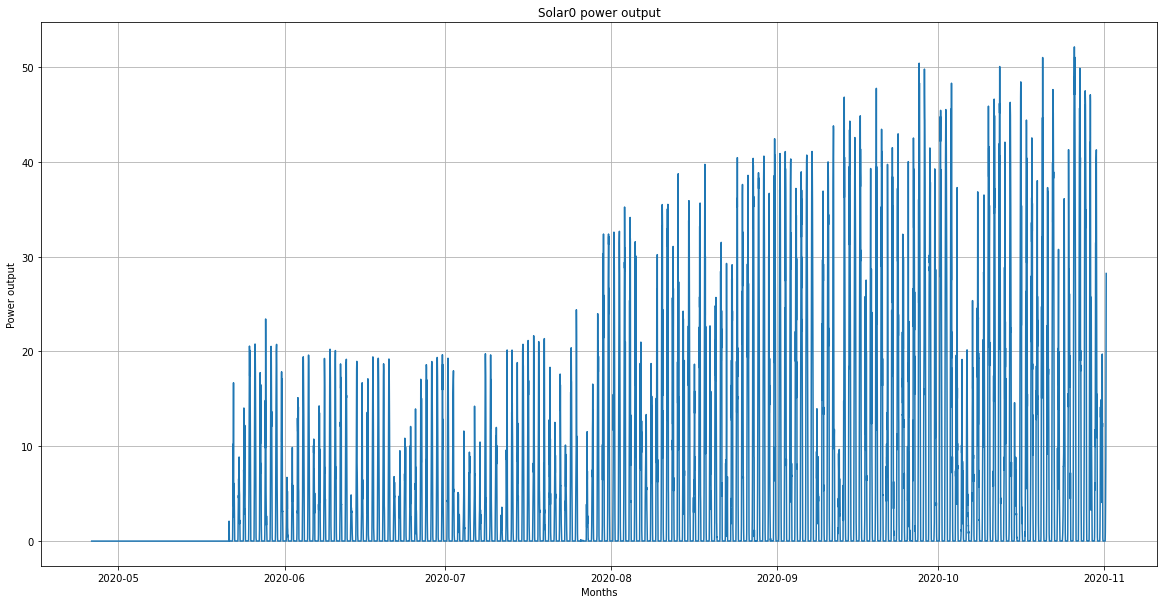

In [1283]:
plt.figure(figsize=(20, 10))
plt.plot(Solar0['Date'], Solar0['Solar0'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar0 power output')
plt.grid(True)
plt.show()

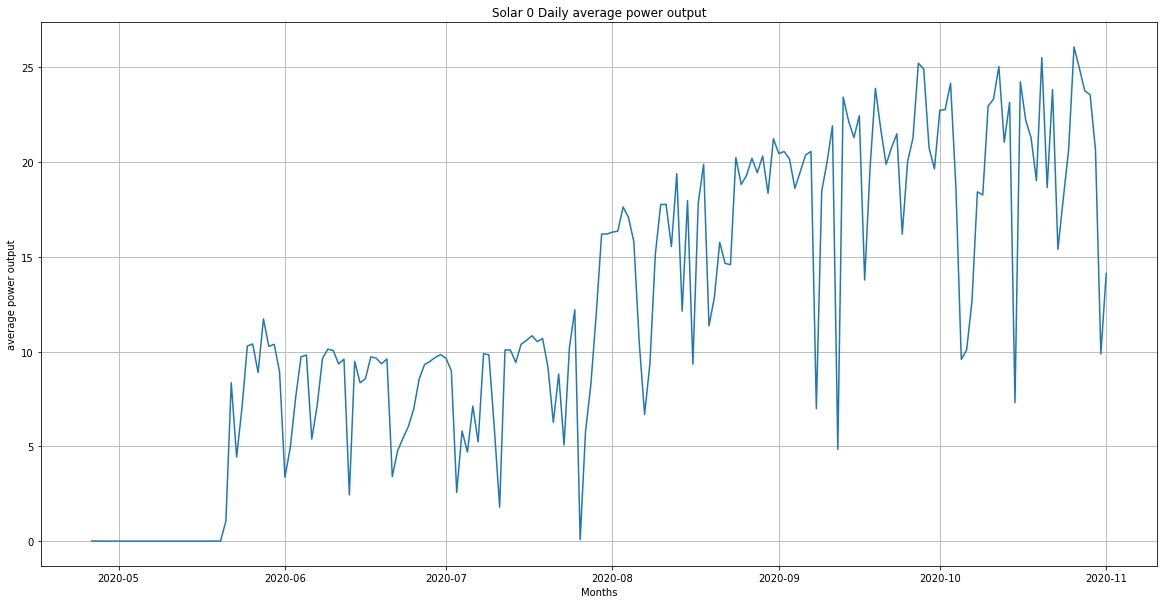

In [1284]:
daily_max_values = Solar0.groupby(Solar0['Date'].dt.date)['Solar0'].max()
daily_min_values = Solar0.groupby(Solar0['Date'].dt.date)['Solar0'].min()
daily_average_values = (daily_max_values + daily_min_values)/2
daily_average_values.index = pd.to_datetime(daily_average_values.index)

plt.figure(figsize=(20, 10))
plt.plot(daily_average_values.index, daily_average_values)
plt.xlabel('Months')
plt.ylabel('average power output')
plt.title('Solar 0 Daily average power output')
plt.grid(True)
plt.show()

In [1285]:
Solar0 = pd.DataFrame({'power_output': daily_average_values})
s = Solar0.index > '2020-07-31 09:00:00'
Solar0 = Solar0[s]
Solar0

,power_output
Date,
2020-08-01,16.300
2020-08-02,16.345
2020-08-03,17.625
2020-08-04,17.075
2020-08-05,15.795
...,...
2020-10-28,23.755
2020-10-29,23.545
2020-10-30,20.640


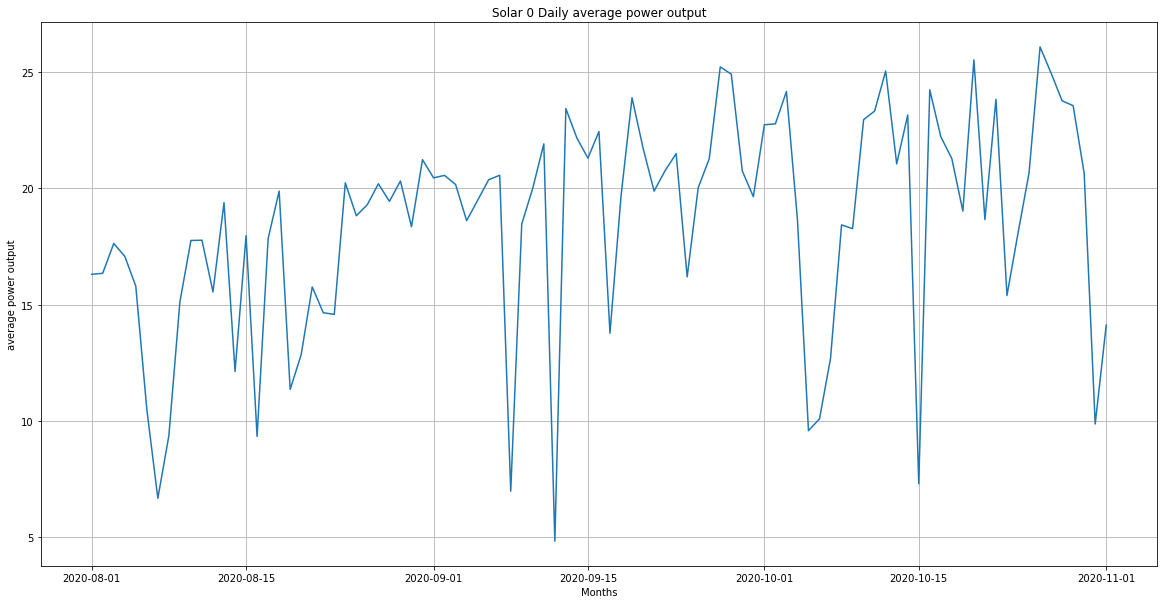

In [1286]:
plt.figure(figsize=(20, 10))
plt.plot(Solar0.index, Solar0['power_output'])
plt.xlabel('Months')
plt.ylabel('average power output')
plt.title('Solar 0 Daily average power output')
plt.grid(True)
plt.show()

In [1287]:
weather = pd.read_csv("monash_weather.csv")
weather = weather.set_index(pd.DatetimeIndex(weather['datetime (UTC)'])).drop(weather.columns[0], axis=1)
weather = weather.resample("15T").mean().round(1) #Resampling into 15-minute intervals
weather = weather.interpolate(method='linear') #Input NaN
weather.index.names = ['timestamp']
weather

,temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
timestamp,,,,,,,,
2010-01-01 10:00:00,18.300,16.400,2.600,101046.400,0.900,287.000,408.40,1.0
2010-01-01 10:15:00,18.400,16.375,2.675,101044.300,0.900,305.450,409.05,1.0
2010-01-01 10:30:00,18.500,16.350,2.750,101042.200,0.900,323.900,409.70,1.0
2010-01-01 10:45:00,18.600,16.325,2.825,101040.100,0.900,342.350,410.35,1.0
2010-01-01 11:00:00,18.700,16.300,2.900,101038.000,0.900,360.800,411.00,1.0
...,...,...,...,...,...,...,...,...
2021-06-01 09:00:00,9.800,3.900,5.600,102077.100,0.700,80.500,296.20,1.0
2021-06-01 09:15:00,10.025,3.975,5.550,102085.225,0.675,97.825,298.50,1.0
2021-06-01 09:30:00,10.250,4.050,5.500,102093.350,0.650,115.150,300.80,1.0


In [1288]:
weather.index = pd.to_datetime(weather.index)
weather = weather.resample('D').mean()
s = weather.index > '2020-07-31 09:00:00'
weather = weather[s]
weather

,temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
timestamp,,,,,,,,
2020-08-01,11.082813,6.476042,6.065104,102334.472917,0.737500,133.691667,281.366667,0.390104
2020-08-02,11.357292,7.243750,4.782292,102203.933333,0.754167,128.950000,283.697917,0.547396
2020-08-03,10.111458,6.714062,3.799479,101554.557292,0.800000,106.650000,303.057292,0.785938
2020-08-04,6.250000,3.084896,6.525521,101278.657813,0.795833,107.583333,283.003125,0.687500
2020-08-05,8.041146,4.544271,5.698437,101613.152604,0.776562,108.625000,290.517708,0.636979
...,...,...,...,...,...,...,...,...
2021-05-28,10.805208,4.885937,4.470833,103140.003646,0.677604,67.512500,319.709375,0.754688
2021-05-29,9.371875,4.255208,2.669792,103290.869792,0.711458,101.375000,295.834375,0.763021
2021-05-30,6.854167,4.146354,1.220833,102921.560937,0.858333,120.725000,256.318229,0.070312


In [1289]:
nov_data = pd.read_csv('NOV_test_data.csv')
nov_data = nov_data.iloc[:, 1:]
nov_data['Date'] = pd.to_datetime(nov_data['Date'])
nov_data

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2020-11-01 10:00:00,77.6,10.1,327.0,1.0,NaN,27.6,31.90,7.95,8.26,7.69,5.13,23.01
1,2020-11-01 10:15:00,25.7,3.1,315.0,NaN,NaN,27.6,32.02,8.51,8.11,7.52,5.01,23.73
2,2020-11-01 10:30:00,25.7,5.3,315.0,NaN,NaN,25.6,32.14,9.07,7.95,7.35,4.89,24.45
3,2020-11-01 10:45:00,25.7,7.9,315.0,1.0,NaN,25.6,36.68,9.38,9.12,8.15,5.59,28.05
4,2020-11-01 11:00:00,25.7,10.5,315.0,NaN,NaN,28.6,41.22,9.68,10.29,8.96,6.29,31.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2020-12-01 08:45:00,218.6,17.3,554.0,1.0,18.0,40.0,13.21,2.32,2.21,3.11,1.31,9.86
2876,2020-12-01 09:00:00,218.6,23.1,554.0,1.0,36.0,46.4,8.24,2.21,2.10,1.97,1.25,6.22
2877,2020-12-01 09:15:00,207.2,6.6,694.0,2.0,18.0,46.4,9.42,2.00,1.90,2.24,1.13,7.14
2878,2020-12-01 09:30:00,207.2,11.0,694.0,1.0,18.0,44.6,7.63,1.78,1.70,1.78,1.01,5.64


In [1290]:
nov_data_Solar0 = nov_data.drop(columns=['Building0','Building1','Building3','Building4','Building5','Building6','Solar5','Solar1','Solar2','Solar3','Solar4'])
nov_data_Solar0.set_index('Date', inplace=True)
nov_data_Solar0

,Solar0
Date,
2020-11-01 10:00:00,31.90
2020-11-01 10:15:00,32.02
2020-11-01 10:30:00,32.14
2020-11-01 10:45:00,36.68
2020-11-01 11:00:00,41.22
...,...
2020-12-01 08:45:00,13.21
2020-12-01 09:00:00,8.24
2020-12-01 09:15:00,9.42


In [1291]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1.e-6):
    vector = start
    for n in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.sum(np.abs(diff)) <= tolerance:
            break
        vector = vector+diff
    return vector

In [1292]:
X = weather
X = (X-X.mean())/X.std()

In [1293]:
t = X.index <= '2020-10-31 09:45:00'
X_train = X[t]
# X_train = X_train.to_numpy()
# X_train = X_train[:]
X_train = X_train.values
X_train

array([[-1.04908527e+00, -1.09943169e+00,  1.27393514e+00,
         9.85777312e-01,  1.22713339e-01, -7.04296977e-01,
        -1.81402101e+00, -9.78014357e-01],
       [-9.79640744e-01, -8.53535774e-01,  4.69271517e-01,
         7.99890034e-01,  3.02870107e-01, -7.58688298e-01,
        -1.72307098e+00, -3.54110797e-01],
       [-1.29484248e+00, -1.02319395e+00, -1.47212554e-01,
        -1.24816037e-01,  7.98301219e-01, -1.01449001e+00,
        -9.67795587e-01,  5.92074072e-01],
       [-2.27180973e+00, -2.18561102e+00,  1.56273849e+00,
        -5.17694596e-01,  7.53262027e-01, -1.00378381e+00,
        -1.75017718e+00,  2.01617871e-01],
       [-1.81864135e+00, -1.71817522e+00,  1.04393791e+00,
        -4.13768008e-02,  5.44955764e-01, -9.91834926e-01,
        -1.45700760e+00,  1.22500534e-03],
       [-1.82391228e+00, -1.60890668e+00, -6.24195459e-01,
         6.06609123e-01,  9.78457987e-01, -1.03499430e+00,
        -1.48512977e+00,  2.92517727e-01],
       [-1.78240369e+00, -1.467274

In [1294]:
s2 = X.index >= '2020-10-31 23:45:00'
t2 = X.index <= '2020-11-30 09:45:00'
X_test = X[s2&t2]
# X_test = X_test.to_numpy()
# X_test = X_test[:]
X_test = X_test.values
X_test

array([[-0.37888627, -0.07898031, -0.37753649,  0.93289753,  0.3197598 ,
         1.02083512, -0.41114319, -0.47393334],
       [ 0.5362793 ,  0.63351729, -1.63664068,  1.10194314,  0.16775253,
         1.46146218, -0.32037604, -0.71564432],
       [ 1.6620186 ,  0.80400958,  0.63980924,  0.28712918, -1.61129555,
         1.42853105,  0.11795597,  0.63958991],
       [ 0.52007119,  0.61533367,  0.83615631, -0.45657569, -0.03492383,
        -0.56205746,  1.11509424,  0.97013484],
       [-0.80425048, -1.39520745,  1.1994474 ,  0.60289636, -0.7949602 ,
         0.09427085, -0.25860479,  0.7098307 ],
       [-0.65047104, -0.63766785, -0.07141801,  0.6946081 ,  0.18464223,
        -0.08266823,  0.24907764,  0.99699161],
       [-0.73296113, -1.37819158,  0.41046541,  1.41604974, -0.93007777,
         0.24458781, -0.16554153,  0.79040103],
       [-0.30917819, -0.48836198, -1.1710923 ,  1.37015494, -0.2207105 ,
         1.5918962 , -1.36973539, -2.35184173],
       [ 0.83461405,  0.3322364 

In [1295]:
Y_train = Solar0['power_output']
Y_test = nov_data_Solar0['Solar0']

In [1296]:
Y_train = pd.DataFrame({'power_output': Y_train})
t3 = Y_train.index <= '2020-10-31 23:45:00'
Y_train = Y_train[t3]
# Y_train = Y_train.to_numpy()
Y_train = Y_train['power_output']
Y_train

Date
2020-08-01    16.300
2020-08-02    16.345
2020-08-03    17.625
2020-08-04    17.075
2020-08-05    15.795
               ...  
2020-10-27    24.945
2020-10-28    23.755
2020-10-29    23.545
2020-10-30    20.640
2020-10-31     9.870
Name: power_output, Length: 92, dtype: float64

In [1297]:
Y_test = pd.DataFrame({'power_output': Y_test})

daily_max_values = Y_test.groupby(Y_test.index.date)['power_output'].max()
daily_min_values = Y_test.groupby(Y_test.index.date)['power_output'].min()
daily_average_values = (daily_max_values + daily_min_values)/2
daily_average_values.index = pd.to_datetime(daily_average_values.index)
Y_test = pd.DataFrame({'power_output': daily_average_values})

t4 = Y_test.index <= '2020-11-30 23:45:00'
Y_test = Y_test[t4]
# Y_test = Y_test.to_numpy()
Y_test = Y_test['power_output']
Y_test

2020-11-01    23.895
2020-11-02    23.880
2020-11-03    23.890
2020-11-04     6.250
2020-11-05    19.500
2020-11-06    15.275
2020-11-07    23.595
2020-11-08    24.470
2020-11-09    24.150
2020-11-10    24.265
2020-11-11    11.290
2020-11-12    26.640
2020-11-13    22.215
2020-11-14    24.260
2020-11-15    22.485
2020-11-16    26.085
2020-11-17    26.120
2020-11-18    24.560
2020-11-19    25.980
2020-11-20    24.670
2020-11-21    20.845
2020-11-22    22.840
2020-11-23    21.025
2020-11-24    16.945
2020-11-25    24.220
2020-11-26    25.455
2020-11-27    24.505
2020-11-28    15.020
2020-11-29    22.260
2020-11-30    24.225
Name: power_output, dtype: float64

In [1298]:
def MSE(a, num_vars):
    yp = 0
    for i in range(0,num_vars):
        yp += a[i]*X_train[:,i]
    yp += a[num_vars] - Y_train
    MSE = np.sum(yp**2)
    return MSE

def MSE_grad(a, num_vars=8):
    yp = 0
    for i in range(0,num_vars):
#         print(f"DEBUG {i}")
        yp += a[i]*X_train[:,i]
    yp += a[num_vars] - Y_train
    MSE_grad = np.array([(2*np.sum(yp*X_train[:,i])) for i in range(0,num_vars)])
    MSE_grad = np.append(MSE_grad, 2 * np.sum(yp))
    return MSE_grad

In [1299]:
# xa = np.zeros((21, 9))
# xs = np.array([.0,.0,.0,.0,.0,.0,.0,.0,.0])
# xa[0] = xs
# lrate = 0.01
# decay = 0.02
# for ix in range(20):
#     lr = lrate/(1+decay*ix)
#     xc = gradient_descent(MSE_grad,xs,lr,n_iter=1)
#     xa[ix+1] = xc
#     xs = xc

# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5)) # initialise the plots and axes

# # # Make data.
# ax1.plot(xa[:,0], xa[:,1], 'r.-')
# E = np.zeros((20,))
# for ix in range(20):
#     E[ix] = MSE(xa[ix,:],8)

# ax2.plot(E)
# print('Model coefficients are ',np.round(xa[20,:],3))

# ax1.set_xlabel('a1')
# ax1.set_ylabel('a2')
# ax2.set_xlabel('Iterations')
# ax2.set_ylabel('f(x)')
# fig.tight_layout(pad=3.0);

In [1301]:
#normalise
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
    
xs = np.zeros(9)
lrate = 0.001
decay = 0.1

for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(MSE_grad,xs,lr,n_iter=80)
    xs = xc

print("Model_coeffecients are:", model_coefs)

predictions = np.dot(X_test, model_coefs[:-1]) + model_coefs[-1]
test_mse = np.mean((predictions - Y_test)**2)
print("test_MSE:", test_mse)

Model_coeffecients are: [-0.33670179 -2.15222196 -0.54201975 -0.15030348 -0.56161794  5.48112484
  1.70264808 -0.63706314 20.29984429]
test_MSE: 18.584506034849717


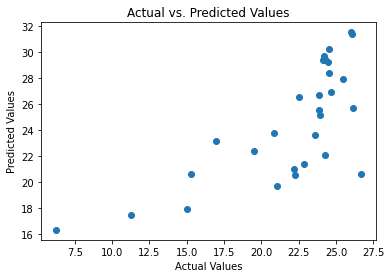

In [1302]:
plt.scatter(Y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()